In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np


In [52]:
from Student import Student
from Student2 import Student2
import torch
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter
from Dataset import WeldingDatasetToTensor
from pdb import set_trace
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler, SequentialSampler
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor, Compose, Resize
from PIL import Image
import matplotlib.pyplot as plt
from utils import heatmap_to_coor, accuracy_sum
import matplotlib.pyplot as plt
########################################    Transformed Dataset

file_to_read = './csv/tail_1000.csv'

# saved_weights = './check_points/saved_weights_50.pth'
# file_to_write = "./csv/pred_dict_50.csv"

# saved_weights = './check_points/saved_weights_200.pth'
# file_to_write = "./csv/pred_dict_200.csv"

# saved_weights = './check_points/weights_adverserial_gan_G.pth'
# file_to_write = "./csv/pred_dict_200_G.csv"

# saved_weights = './saved_weights_4265.pth'
# file_to_write = "./csv/pred_dict_4265.csv"

# saved_weights = './check_points/saved_weights_cascade_4265.pth'
# file_to_write = "./csv/pred_dict_cascade_4265.csv"

# saved_weights = './check_points/saved_weights_cascade2_4265.pth'
# file_to_write = "./csv/pred_dict_cascade2_4265.csv"

saved_weights = './check_points/saved_weights_cascade3_4265.pth'
file_to_write = "./csv/pred_dict_cascade3_4265.csv"
batch_size = 4

transformed_dataset = WeldingDatasetToTensor(csv_file=file_to_read, root_dir='./')


valid_loader = DataLoader(transformed_dataset, batch_size=batch_size, \
                        num_workers=1)

model = Student().cuda()
model.load_state_dict(torch.load(saved_weights))

criterion = nn.MSELoss()
# criterion = nn.CrossEntropyLoss()

# Print model's state_dict
# print("Model's state_dict:")
# for param_tensor in model.state_dict():
    # print(param_tensor, "\t", model.state_dict()[param_tensor].size())


model.eval()
valid_loss = 0
distances = []
all_acc_x = []
all_acc_y = []
f = open(file_to_write, "w")
with torch.no_grad():
    total_acc_x = 0
    total_acc_y = 0
    e_distances = 0
    
    for i, batch in enumerate(valid_loader):
        inputs = batch['image'].float().cuda()
        labels = batch['hmap'].float().cuda()
        coors = batch['coor'].numpy()
        img_names = batch['img_name']
        outputs = model(inputs)
        valid_loss += criterion(outputs, labels)
        outputs = outputs.cpu().detach().numpy()
        for index, out in enumerate(outputs):
            x, y = heatmap_to_coor(out.reshape(224, 224))
            f.write(img_names[index] + ',' + \
                    str(int(x / 224 * 1280)) + ',' + str(int(y / 224 * 1024)) + '\n')
            e_distance = ((int(x/224*1280)-coors[index][0])**2 + \
                            (int(y/224*1024)-coors[index][1])**2)**0.5
            distances.append(e_distance)
            print(e_distance)
            e_distances += e_distance

        # outputs = outputs.cpu().detach().numpy()
        labels = labels.cpu().detach().numpy()
        sum_acc_x, sum_acc_y, list_acc_x, list_acc_y = accuracy_sum(outputs, coors)
        all_acc_x.extend(list_acc_x)
        all_acc_y.extend(list_acc_y)
        total_acc_x += sum_acc_x
        total_acc_y += sum_acc_y

    print("=" * 30)
    print("total acc_x = {:.10f}".format(total_acc_x/len(valid_loader.dataset)))
    print("total acc_y = {:.10f}".format(total_acc_y/len(valid_loader.dataset)))
    print("Euclidean Distance: {}".format(e_distances/len(valid_loader.dataset)))
    print("=" * 30)

    f.close()
    valid_loss = valid_loss / len(valid_loader.dataset)
    print('valid loss {}'.format(valid_loss))


3.605551275463989
2.23606797749979
2.0
8.06225774829855
7.615773105863909
7.0710678118654755
5.830951894845301
7.211102550927978
4.242640687119285
3.605551275463989
3.605551275463989
8.06225774829855
11.180339887498949
10.770329614269007
3.1622776601683795
6.4031242374328485
3.605551275463989
3.1622776601683795
3.1622776601683795
8.06225774829855
6.4031242374328485
5.385164807134504
5.830951894845301
1.4142135623730951
2.0
1.0
4.0
3.605551275463989
2.23606797749979
7.280109889280518
5.0
11.704699910719626
7.0710678118654755
5.0
9.219544457292887
6.082762530298219
8.0
5.385164807134504
1.0
8.06225774829855
4.47213595499958
4.123105625617661
14.866068747318506
1.0
5.0990195135927845
7.810249675906654
9.486832980505138
7.0710678118654755
6.082762530298219
8.06225774829855
3.605551275463989
2.23606797749979
2.23606797749979
8.246211251235321
11.40175425099138
8.48528137423857
2.23606797749979
3.0
6.082762530298219
24.020824298928627
3.1622776601683795
6.082762530298219
2.23606797749979
7.8

4.47213595499958
5.0990195135927845
1.4142135623730951
14.560219778561036
8.602325267042627
336.1220016601115
2.23606797749979
3.1622776601683795
13.416407864998739
2.0
4.47213595499958
4.47213595499958
7.0710678118654755
6.324555320336759
15.0
2.8284271247461903
9.055385138137417
3.1622776601683795
6.4031242374328485
12.041594578792296
8.94427190999916
3.1622776601683795
15.033296378372908
11.40175425099138
5.656854249492381
5.0
5.0
8.94427190999916
6.4031242374328485
10.0
1.0
2.23606797749979
6.324555320336759
44.10215414239989
4.242640687119285
4.0
2.23606797749979
8.94427190999916
2.23606797749979
10.63014581273465
9.055385138137417
4.242640687119285
11.40175425099138
1.0
1.0
4.123105625617661
9.055385138137417
5.656854249492381
17.11724276862369
28.635642126552707
9.219544457292887
7.0710678118654755
7.211102550927978
3.1622776601683795
12.529964086141668
15.132745950421556
4.123105625617661
2.23606797749979
2.23606797749979
9.848857801796104
8.54400374531753
36.49657518178932
9.0

Validation on 1000 samples
The max Euclidean Distance is: 932.3995924495034
The minume Euclidean Distance is: 0.0
The number of predictions which distance < 3 pixels: 157 / 1000
The number of predictions which distance < 5 pixels: 378 / 1000
The number of predictions which distance < 7 pixels: 613 / 1000
The number of predictions which distance < 10 pixels: 836 / 1000
The number of predictions which distance < 20 pixels: 956 / 1000
The number of predictions which distance > 20 pixels: 44 / 1000
[173.55690709389816, 249.3772243008571, 318.76323501934786, 318.76323501934786, 336.1220016601115, 602.182696529882, 614.0244294814336, 794.3664141943565, 843.0664268015896, 932.3995924495034]
262
828
842
842
545
328
747
846
324
326


<IPython.core.display.Javascript object>


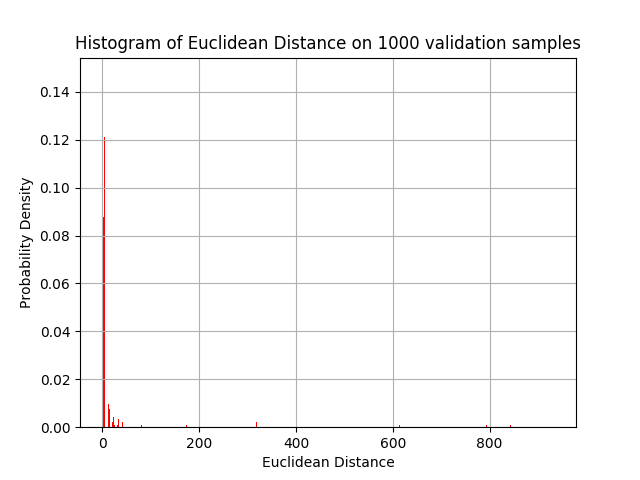

In [86]:
print('Validation on {} samples'.format(len(distances)))
print('The max Euclidean Distance is: {}'.format(max(distances)))
print('The minume Euclidean Distance is: {}'.format(min(distances)))
distance_np = np.asarray(distances)

print('The number of predictions which distance < 3 pixels: {} / {}'.format(len(distance_np[distance_np < 3]), len(distances)))
print('The number of predictions which distance < 5 pixels: {} / {}'.format(len(distance_np[distance_np < 5]), len(distances)))
print('The number of predictions which distance < 7 pixels: {} / {}'.format(len(distance_np[distance_np < 7]), len(distances)))
print('The number of predictions which distance < 10 pixels: {} / {}'.format(len(distance_np[distance_np < 10]), len(distances)))
print('The number of predictions which distance < 20 pixels: {} / {}'.format(len(distance_np[distance_np < 20]), len(distances)))
print('The number of predictions which distance > 20 pixels: {} / {}'.format(len(distance_np[distance_np > 20]), len(distances)))

ordered_distances = [*distances]
ordered_distances.sort()

print(distances_ordered[-10:])

print(distances.index(distances_ordered[-10]))
print(distances.index(distances_ordered[-9]))
print(distances.index(distances_ordered[-8]))
print(distances.index(distances_ordered[-7]))
print(distances.index(distances_ordered[-6]))
print(distances.index(distances_ordered[-5]))
print(distances.index(distances_ordered[-4]))
print(distances.index(distances_ordered[-3]))
print(distances.index(distances_ordered[-2]))
print(distances.index(distances_ordered[-1]))



# print(np.where(distance_np == max(distance_np), distance_np))
# print(distance_np[326])
# distances.sort()
# print(distances[-2])
# print()
# print(np.where(distance_np == distances[-2]))
plt.close()
plt.hist(distances, 1000, density=True, color='red', rwidth=0.5, cumulative=False)
plt.xlabel('Euclidean Distance')
plt.ylabel('Probability Density')
plt.grid(True)
plt.title('Histogram of Euclidean Distance on 1000 validation samples')
plt.show()


<IPython.core.display.Javascript object>


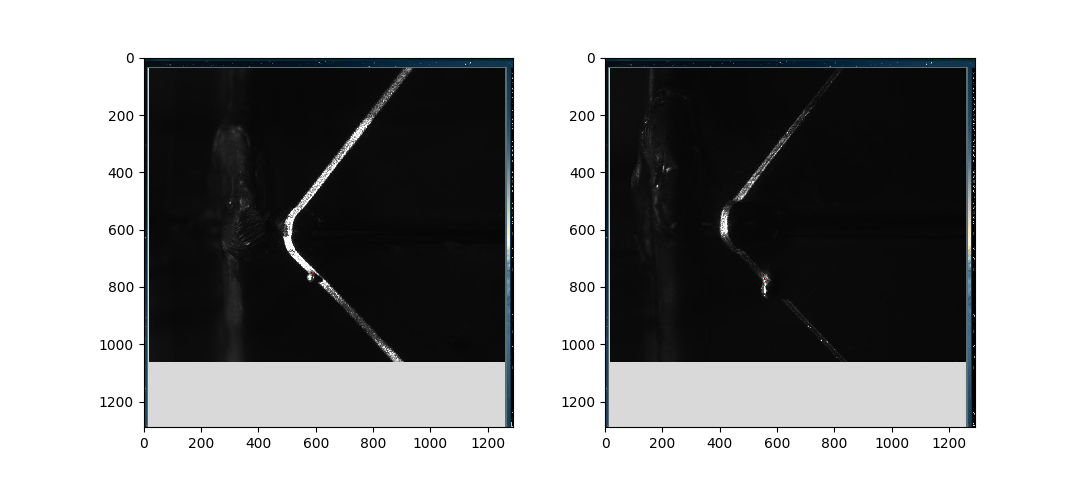

In [85]:
import matplotlib.image as image
img_10 = image.imread('pred_images/saved_test_262.jpg')
img_9 = image.imread('pred_images/saved_test_828.jpg')
img_8 = image.imread('pred_images/saved_test_842.jpg')
img_7 = image.imread('pred_images/saved_test_545.jpg')
img_6 = image.imread('pred_images/saved_test_328.jpg')
img_5 = image.imread('pred_images/saved_test_747.jpg')
img_4 = image.imread('pred_images/saved_test_846.jpg')
img_3 = image.imread('pred_images/saved_test_324.jpg')
img_2 = image.imread('pred_images/saved_test_326.jpg')
img_1 = image.imread('pred_images/saved_test_326.jpg')
plt.close()
f, axes = plt.subplots(1, 2)
axes[0].imshow(img_10)
axes[1].imshow(img_9)


<IPython.core.display.Javascript object>


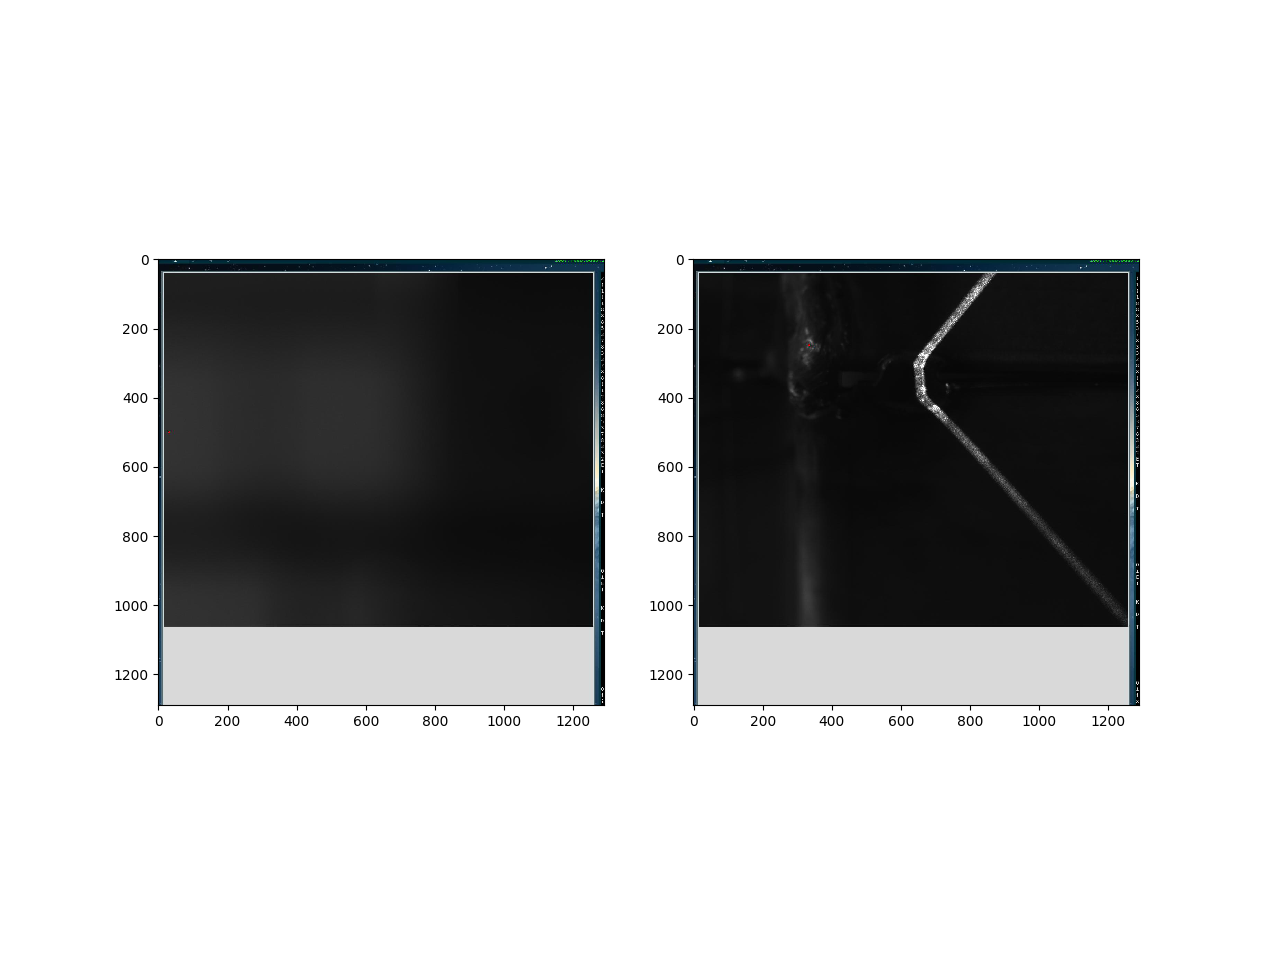

In [84]:
plt.close()
f, axes = plt.subplots(1, 2)
axes[0].imshow(img_8)
axes[1].imshow(img_7)

<IPython.core.display.Javascript object>


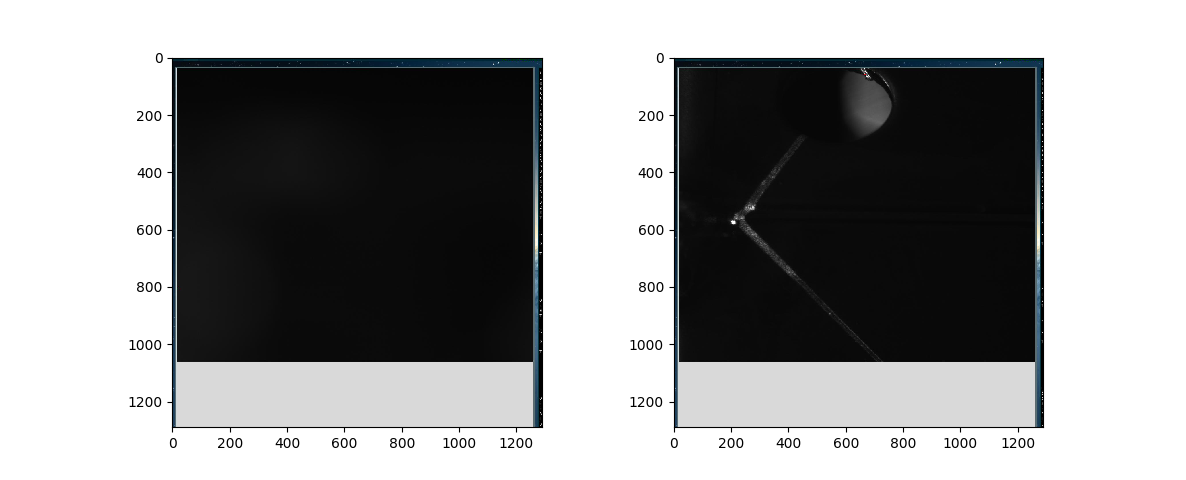

In [87]:
plt.close()
f, axes = plt.subplots(1, 2)
axes[0].imshow(img_6)
axes[1].imshow(img_5)

<IPython.core.display.Javascript object>


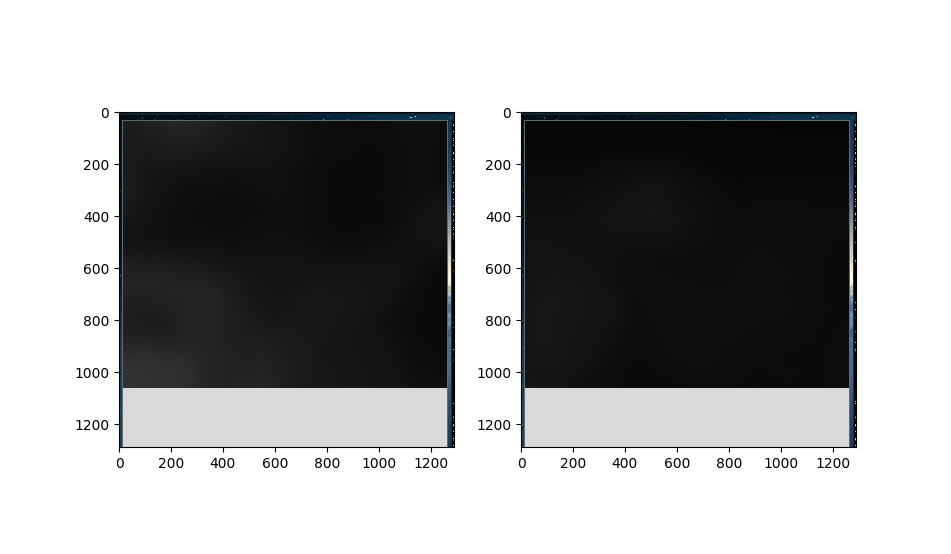

In [82]:
plt.close()
f, axes = plt.subplots(1, 2)
axes[0].imshow(img_4)
axes[1].imshow(img_3)

Validation on 1000 samples
The max accuracy on X is: 1.0
The minume accuracy on X is: 0.609375
(1000,)


<IPython.core.display.Javascript object>


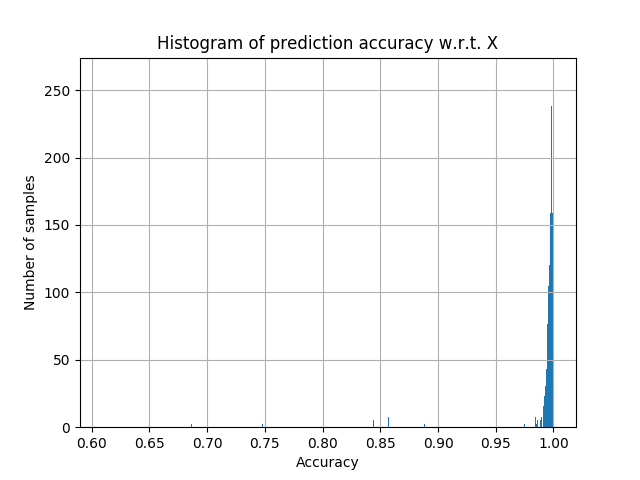

In [7]:
print('Validation on {} samples'.format(len(all_acc_x)))
print('The max accuracy on X is: {}'.format(max(all_acc_x)))
print('The minume accuracy on X is: {}'.format(min(all_acc_x)))
a = np.asarray(all_acc_x)
print(a.shape)
plt.close()
plt.hist(all_acc_x, 1000, density=True)
plt.xlabel('Accuracy')
plt.ylabel('Number of samples')
plt.grid(True)
plt.title('Histogram of prediction accuracy w.r.t. X')
plt.show()


Validation on 1000 samples
The max accuracy on Y is: 1.0
The minume accuracy on Y is: 0.1997767857142857


<IPython.core.display.Javascript object>


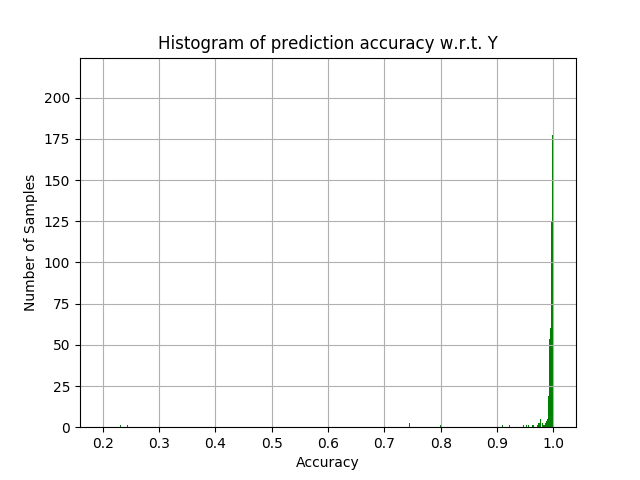

In [9]:
print('Validation on {} samples'.format(len(all_acc_y)))
print('The max accuracy on Y is: {}'.format(max(all_acc_y)))
print('The minume accuracy on Y is: {}'.format(min(all_acc_y)))
plt.close()
plt.hist(all_acc_y, 1000, color='green', density=True)
plt.xlabel('Accuracy')
plt.ylabel('Number of Samples')
plt.grid(True)
plt.title('Histogram of prediction accuracy w.r.t. Y')
plt.show()